<a href="https://colab.research.google.com/github/JuanPoG/Tareas_Multimedia/blob/main/Actividad_3/Actividad_3_PobleteJuan_20521642_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Juan Pablo Poblete</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


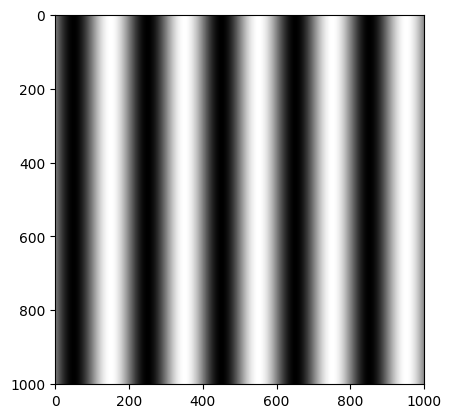

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x) #lista con coordenada
wavelength = 200

grating = np.sin(2 * np.pi * X / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


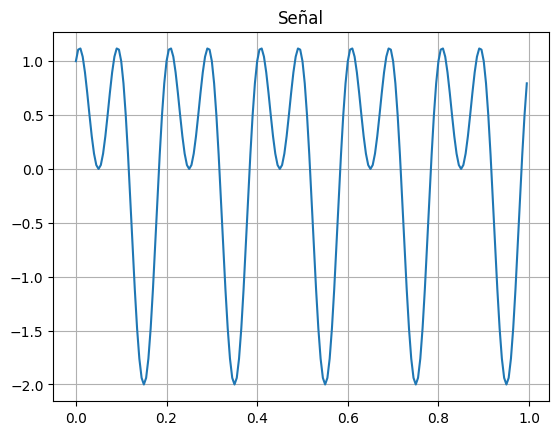

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

samp = 200 #muestras del vector
t = 1.0/samp #intervalo entre muestras
x = np.arange(0,1,t) #vector de tiempo
freq = 5.0 #frecuencia en Hz

fun_1 = np.sin(2*np.pi*freq*x) + np.cos(4*np.pi*freq*x) #señal senoidal

plt.plot(x,fun_1)
plt.title('Señal')
plt.grid()
plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

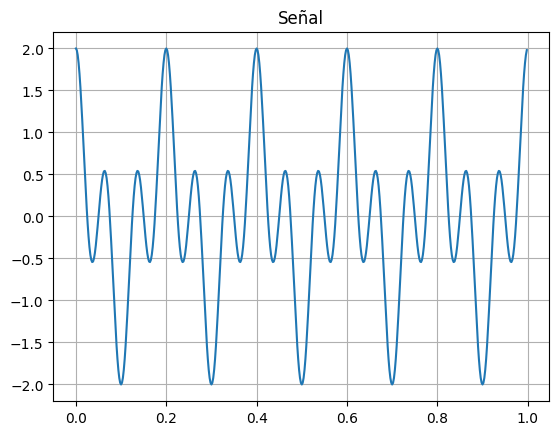

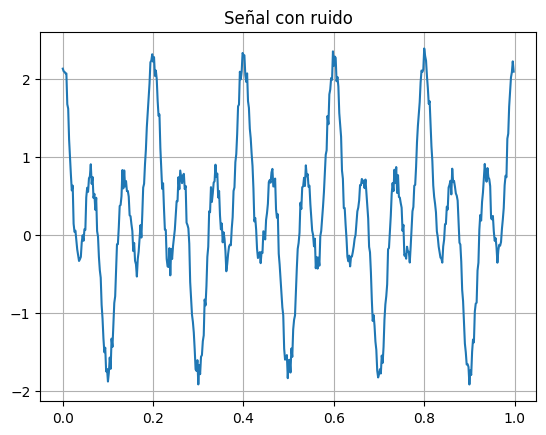

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#funcion ruido gaussiano
def gauss(z,sigma,mu):
    noise = np.random.randn(z)
    a = 1.0/(sigma*np.sqrt(2*np.pi))
    b = -(1/2)*((noise-mu)/sigma)**2
    gauss_noise = a*np.exp(b)
    return gauss_noise

#vector
samp = 500 #muestras del vector
t = 1.0/samp #intervalo entre muestras
x = np.arange(0,1,t) #vector de tiempo

#señal
freq = 5.0 #frecuencia en Hz
w = 2*np.pi*freq #frecuencia angular
signal = np.cos(w*x) + np.cos(3*w*x)

plt.plot(x,signal)
plt.title('Señal')
plt.grid()
plt.show()

#señal de ruido
noise = 2*gauss(len(x),2,2) #genera numeros aleatorios
noiseSignal = signal + noise

plt.plot(x,noiseSignal)
plt.title('Señal con ruido')
plt.grid()
plt.show()

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


(0.0, 5.0)

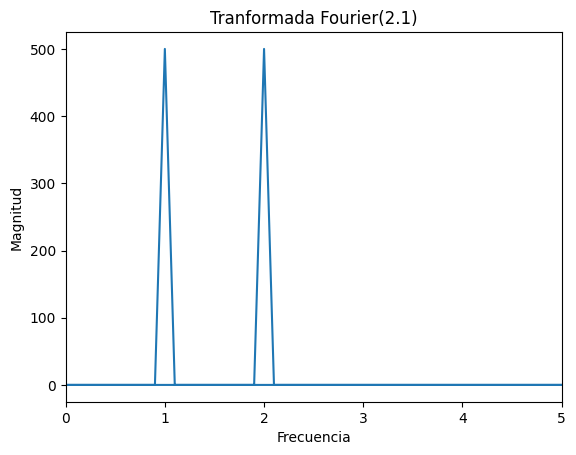

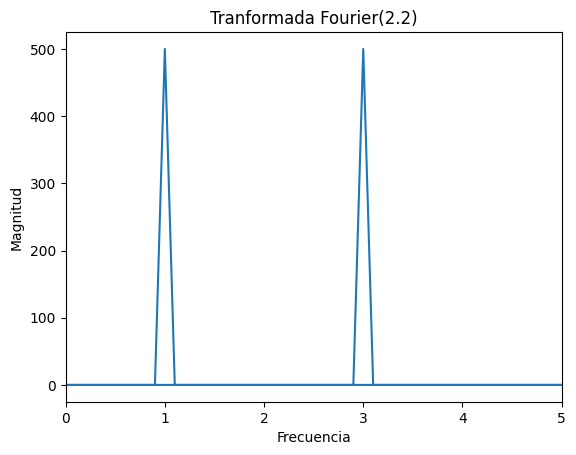

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#funcion que calcula la tranformada de fourier
def tran_f(signal):


    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    tf = np.dot(e, signal)#multiplica la señal con la exponencial generada

    return tf

# Señales
t = np.arange(0,10,0.01)
señal=np.sin(2*np.pi*t)+np.cos(2*np.pi*2*t)
signal = np.cos(2*np.pi*t) + np.cos(3*2*np.pi*t)

tf = tran_f(señal)
tf1 = tran_f(signal)
frec=np.fft.fftfreq(len(señal),0.01)#vector de frecuencias

# Grafica la magnitud de la tranformada de fourier
plt.plot(frec,np.abs(tf))
plt.title('Tranformada Fourier(2.1)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(0,5)
plt.figure()
plt.plot(frec,np.abs(tf1))
plt.title('Tranformada Fourier(2.2)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(0,5)

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

un resultado normalizado es escalar o hacer proporcional sin unidad de medida para poder comparar elementos con distintas variables o unidades de medida.

(0.0, 5.0)

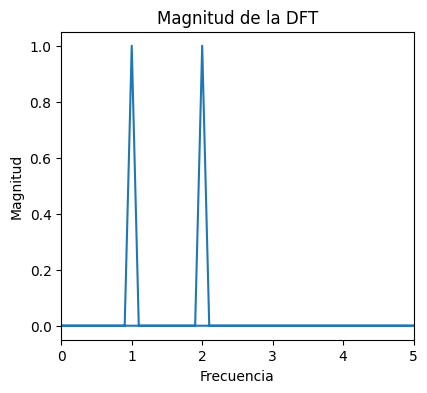

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def tran_f(signal):


    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    tf = np.dot(e, signal)/(N/2) #normaliza con respecto a N

    return tf

# Señal de ejemplo
t=np.arange(0,10,0.01)
señal=np.sin(2*np.pi*1*t)+np.cos(2*np.pi*2*t)
frec=np.fft.fftfreq(len(señal),0.01)

# Calcular la DFT
tf = tran_f(señal)

# Graficar la magnitud de la DFT
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(frec,np.abs(tf))
plt.title('Magnitud de la DFT')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(0,5)


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

Text(0, 0.5, 'Magnitud')

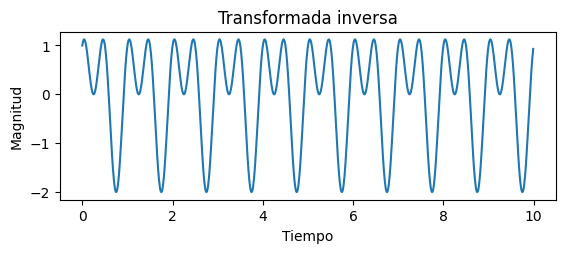

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tran_f_i(signal):


    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N) #exponencial para transformada inversa

    tif = np.dot(e, signal)/N

    return tif

tif = tran_f_i(tran_f(señal))

# Graficar la transformada inversa
plt.subplot(2, 1, 1)
plt.plot(t,tif)
plt.title('Transformada inversa')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

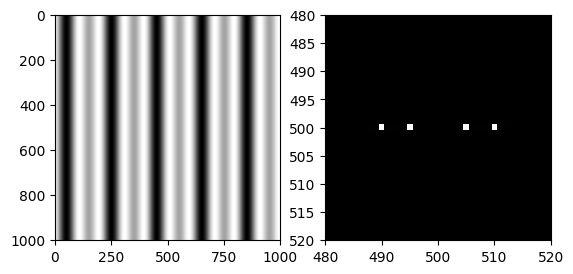

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = 0
grating = np.sin(
2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)+np.cos(
2*np.pi*(2*(X*np.cos(angle) + Y*np.sin(angle))) / wavelength)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

1.

2. los resultados de la tranformada de fourier se puede entender el comportamento de la señal en el dominio de la frecuencia, por ejemplo, las señales que se utilizaron en esta actividad estaban compuestas por dos sinusoides de distinta frecuencia, al calcular la transformada sobre estas señales se pudo ver como estaba compuesta.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

[Normalizacion estadistica]https://economipedia.com/definiciones/normalizacion-estadistica.html